<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-details" data-toc-modified-id="env-details-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env details</a></span></li><li><span><a href="#data-exploration" data-toc-modified-id="data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data exploration</a></span></li></ul></div>

# env details
python pkg: scipy (1.4.1), numpy (1.18.2)

In [1]:
using RCall, DataFrames, CSV, Plots

# data exploration

In [2]:
rAw = CSV.read("../result/maxYield_0.1.csv")
describe(rAw)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x,0.423795,0.0,0.4,1.0,,,Float64
2,e_PR,0.563,0.563,0.563,0.563,,,Float64
3,e_P,0.63,0.63,0.63,0.63,,,Float64
4,g_P,0.426855,0.259,0.4373,0.556,,,Float64
5,a_P,0.166529,0.001,0.1606,0.4,,,Float64
6,e_BR,0.6,0.6,0.6,0.6,,,Float64
7,e_B,0.55,0.55,0.55,0.55,,,Float64
8,g_B,2.77795,1.046,2.889,4.242,,,Float64
9,m_B,0.14,0.14,0.14,0.14,,,Float64


In [3]:
@rput rAw
R"
u0 = vector(mode='list', length=9)
for(i in 1:9){
    u0[[i]] = unique(rAw[,i])
};rm(i)
u0
"

RObject{VecSxp}
[[1]]
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

[[2]]
[1] 0.563

[[3]]
[1] 0.63

[[4]]
 [1] 0.2590 0.2888 0.3184 0.3481 0.3780 0.4075 0.4373 0.4670 0.4966 0.5264
[11] 0.5560

[[5]]
 [1] 0.0010 0.0409 0.0808 0.1207 0.1606 0.2004 0.2404 0.2803 0.3203 0.3600
[11] 0.4000

[[6]]
[1] 0.6

[[7]]
[1] 0.55

[[8]]
 [1] 1.046 1.169 1.292 1.415 1.537 1.660 1.783 1.906 2.030 2.152 2.275 2.398
[13] 2.520 2.643 2.766 2.889 3.012 3.135 3.258 3.380 3.504 3.627 3.750 3.871
[25] 3.994 4.117 4.242

[[9]]
[1] 0.14



┌ Info: Saved animation to 
│   fn = /home/xxxxxx/Project/sandbox/gif/sfgB.gif
└ @ Plots /home/xxxxxx/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/xxxxxx/Project/sandbox/gif/sfgB.gif")
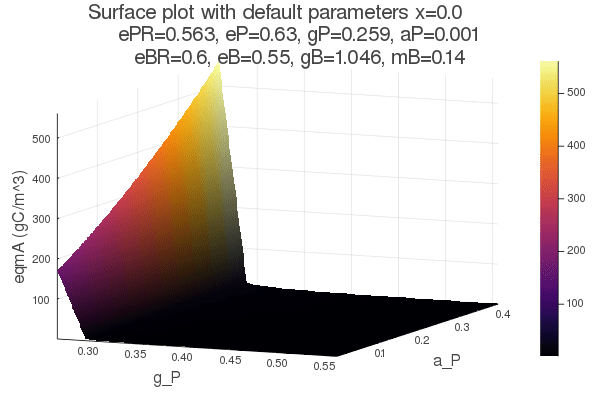

In [6]:
setPara = repeat([1],9) # 9 default parameter
colChg = 8 # col for animation
xyAxis =[4 5 13] # xyz axis col
aa = @animate for i in 1:length(unique(rAw[:,colChg]))
    setPara[colChg] = i
    @rput setPara xyAxis
    R"
    ## extract necessary data
    pp = rAw
    for(i in 1:9){
        if(i%in%xyAxis==F){
        pp = pp[which(pp[,i]==u0[[i]][setPara[i]]),]
    }};rm(i)
    
    ## convert data into matrix
    mm = matrix(NA, nr=length(unique(pp[,xyAxis[1]])), nc=length(unique(pp[,xyAxis[2]])))
    rownames(mm)=unique(pp[,xyAxis[1]])
    colnames(mm)=unique(pp[,xyAxis[2]])
    for(i0 in 1:nrow(pp)){
        mm[which(rownames(mm)==pp[i0,xyAxis[1]]),which(colnames(mm)==pp[i0,xyAxis[2]])] <- pp[i0,xyAxis[3]]
    };rm(i0)
    mmR <- as.numeric(rownames(mm))
    mmC <- as.numeric(colnames(mm))
    "
    @rget mm mmR mmC u0
    
    if size(mm)[1] >0
    plot(mmR, mmC, mm, st=:surface,# zlim=[0,30],
    xlabel=string(names(rAw)[xyAxis[1]]),
    ylabel=string(names(rAw)[xyAxis[2]]),
    zlabel=string(names(rAw)[xyAxis[3]])*" (gC/m^3)",
    title="Surface plot with default parameters x="*string(u0[1][setPara[1]])*"
        ePR="*string(u0[2][setPara[2]])*", eP="*string(u0[3][setPara[3]])*", gP="*string(u0[4][setPara[4]])*", aP="*string(u0[5][setPara[5]])*"
        eBR="*string(u0[6][setPara[6]])*", eB="*string(u0[7][setPara[7]])*", gB="*string(u0[8][setPara[8]])*", mB="*string(u0[9][setPara[9]]))
    end
end
gif(aa, "gif/sfgB.gif", fps=15)

┌ Info: Saved animation to 
│   fn = /home/xxxxxx/Project/sandbox/gif/sfaP.gif
└ @ Plots /home/xxxxxx/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/xxxxxx/Project/sandbox/gif/sfaP.gif")
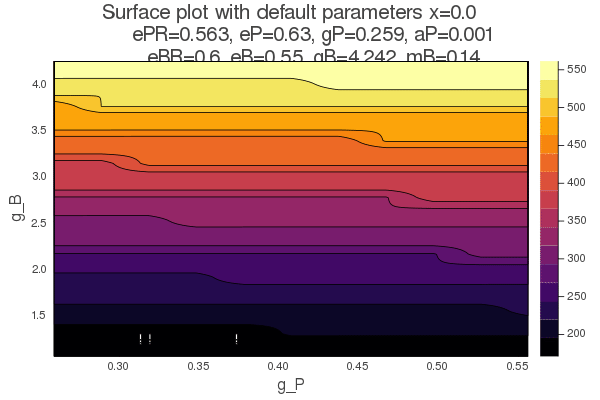

In [12]:
colChg = 5 # col for animation
xyAxis =[4 8 13] # xyz axis col
aa = @animate for i in 1:length(unique(rAw[:,colChg]))
    setPara[colChg] = i
    @rput setPara xyAxis
    R"
    ## extract necessary data
    pp = rAw
    for(i in 1:9){
        if(i%in%xyAxis==F){
        pp = pp[which(pp[,i]==u0[[i]][setPara[i]]),]
    }};rm(i)
    
    ## convert data into matrix
    mm = matrix(NA, nr=length(unique(pp[,xyAxis[1]])), nc=length(unique(pp[,xyAxis[2]])))
    rownames(mm)=unique(pp[,xyAxis[1]])
    colnames(mm)=unique(pp[,xyAxis[2]])
    for(i0 in 1:nrow(pp)){
        mm[which(rownames(mm)==pp[i0,xyAxis[1]]),which(colnames(mm)==pp[i0,xyAxis[2]])] <- pp[i0,xyAxis[3]]
    };rm(i0)
    mmR <- as.numeric(rownames(mm))
    mmC <- as.numeric(colnames(mm))
    "
    @rget mm mmR mmC u0
    
    if size(mm)[1] >0
    plot(mmR, mmC, mm, st=:contourf,# zlim=[0,30],
    xlabel=string(names(rAw)[xyAxis[1]]),
    ylabel=string(names(rAw)[xyAxis[2]]),
    zlabel=string(names(rAw)[xyAxis[3]])*" (gC/m^3)",
    title="Surface plot with default parameters x="*string(u0[1][setPara[1]])*"
        ePR="*string(u0[2][setPara[2]])*", eP="*string(u0[3][setPara[3]])*", gP="*string(u0[4][setPara[4]])*", aP="*string(u0[5][setPara[5]])*"
        eBR="*string(u0[6][setPara[6]])*", eB="*string(u0[7][setPara[7]])*", gB="*string(u0[8][setPara[8]])*", mB="*string(u0[9][setPara[9]]))
    end
end
gif(aa, "gif/sfaP.gif", fps=5)